In [ ]:
# Part-I: Naive Bayes Classifier
--------------------------------
# Task 1: Theory Questions 

1. What is the core assumption of Naive Bayes?
A. The core assumption of Naive Bayes is that all features (predictors) are conditionally 
independent of each other given the class label. This means the presence or value of one
feature does not affect or depend on the presence of another feature in determining the outcome.

2. Differentiate between GaussianNB, MultinomialNB, and BernoulliNB.
A. GaussianNB is used when features are continuous and assumed to follow a normal (Gaussian) distribution.
MultinomialNB is suited for discrete count data (e.g., word counts in text classification).
BernoulliNB is used for binary/boolean features (e.g., word presence or absence in text).

3. Why is Naive Bayes considered suitable for high-dimensional data?
A. Naive Bayes is computationally efficient and scalable because it simplifies the joint probability
model using the independence assumption. This allows it to handle high-dimensional feature spaces 
(like in text classification) without requiring complex computations or large amounts of data to perform well.

In [3]:
# Task 2: Spam Detection using MultinomialNB 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 1: Load and clean the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only the necessary columns
df.columns = ['label', 'message']  # Rename columns
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Encode target labels

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

# Step 3: Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 5: Make predictions and evaluate
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Print results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy : 0.9839
Precision: 0.9853
Recall   : 0.8933
Confusion Matrix:
[[963   2]
 [ 16 134]]


In [6]:
# Task 3: GaussianNB with Iris or Wine Dataset 

from sklearn.datasets import load_wine  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset (Wine)
data = load_wine()  
X = data.data
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train GaussianNB classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Step 4: Train Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

# Step 5: Train Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

# Step 6: Print results
print("Accuracy Comparison:")
print(f"GaussianNB         : {acc_gnb:.4f}")
print(f"Logistic Regression: {acc_log:.4f}")
print(f"Decision Tree      : {acc_tree:.4f}")
print("\nClassification Report for GaussianNB:\n",classification_report(y_test, y_pred_gnb, target_names=data.target_names))


Accuracy Comparison:
GaussianNB         : 1.0000
Logistic Regression: 0.9722
Decision Tree      : 0.9444

Classification Report for GaussianNB:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\katiy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Part-II: Decision Trees 
--------------------------
# Task 4: Conceptual Questions

1. What is entropy and information gain?
A. Entropy is a measure of impurity or randomness in a dataset; it quantifies the uncertainty in class labels.
Information Gain measures the reduction in entropy after a dataset is split based on a feature; it helps 
identify the most informative feature for splitting.

2. Explain the difference between Gini Index and Entropy.
A. Both are impurity measures used in decision trees.
Entropy uses logarithmic calculations and tends to be more computationally intensive.
Gini Index is simpler (uses squared probabilities) and generally performs slightly faster.
Gini tends to create pure splits quicker, while entropy can be more informative in sme cases.

3. How can a decision tree overfit? How can this be avoided?
A. A decision tree overfits when it becomes too complex and learns noise or minor patterns in the training data.
This can be avoided by:
>Limiting tree depth (max_depth)
>Setting a minimum number of samples per leaf (min_samples_leaf)
>Pruning the tree
>Using ensemble methods like Random Forests or boosting.

C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\4139040822.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\4139040822.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Accuracy: 0.7821
Confusion Matrix:
 [[89 16]
 [23 51]]


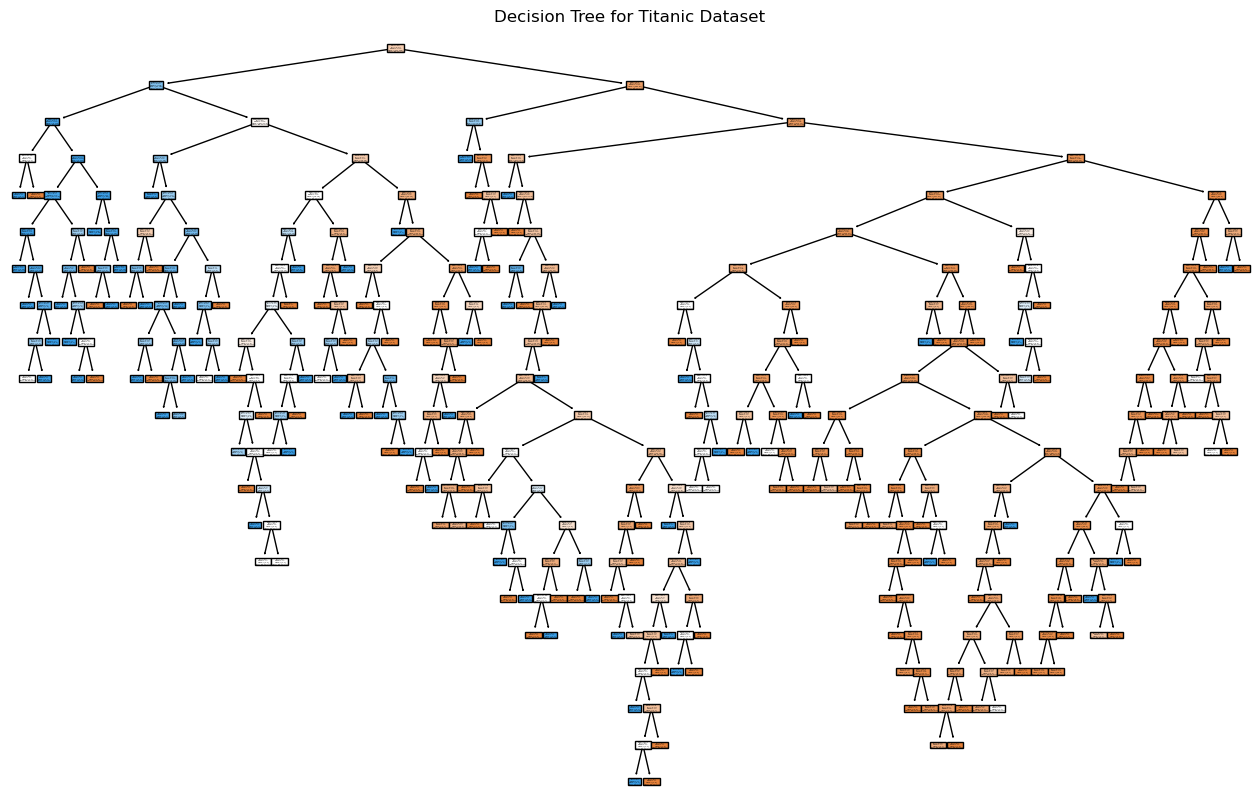

In [8]:
# Task 5: Decision Tree on Titanic Dataset 

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Step 2: Preprocess data
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']].copy()

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])
df['embarked'] = le_embarked.fit_transform(df['embarked'])

# Step 3: Split dataset
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", round(accuracy, 4))
print("Confusion Matrix:\n", conf_matrix)

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()


C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\1652765846.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\1652765846.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

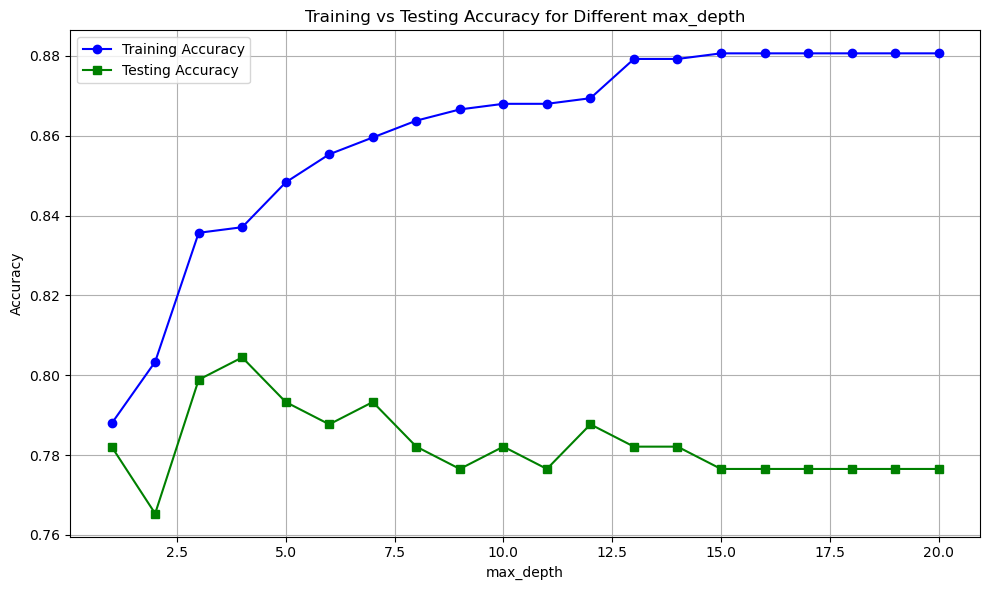

In [9]:
# Task 6: Model Tuning 

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']].copy()

# Preprocessing
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tuning and plotting
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, min_samples_split=10, random_state=42)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(depths, test_accuracies, marker='s', label='Testing Accuracy', color='green')
plt.title('Training vs Testing Accuracy for Different max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Part-III: Ensemble Learning – Bagging, Boosting, Random Forest
----------------------------------------------------------------
# Task 7: Conceptual Questions 

1. What is the difference between Bagging and Boosting?
A. Bagging (Bootstrap Aggregating) trains multiple models independently in parallel on different random 
subsets of the data and combines their outputs (e.g., Random Forest).
Boosting trains models sequentially, where each new model focuses on the errors made by the previous 
ones (e.g., AdaBoost, XGBoost), aiming to reduce bias.

2. How does Random Forest reduce variance?
A. Random Forest reduces variance by averaging the predictions of many uncorrelated decision trees. 
Each tree is trained on a different random subset of data and features, so their errors cancel 
each other out when aggregated, resulting in a more stable and generalized model.

3. What is the weakness of boosting-based methods?
A. Boosting methods are sensitive to noisy data and outliers, as they focus heavily on correcting 
previous errors, which can lead to overfitting. They also tend to be computationally expensive 
due to their sequential training nature.


Decision Tree :
Accuracy : 0.7821
Precision: 0.7612
Recall   : 0.6892

Random Forest :
Accuracy : 0.8101
Precision: 0.8125
Recall   : 0.7027



C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\3641555923.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\3641555923.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

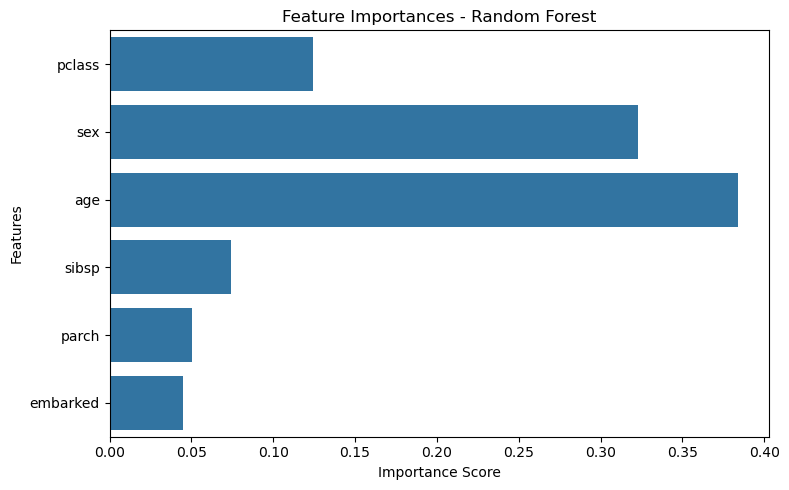

In [11]:
# Task 8: Random Forest vs Decision Tree 

from sklearn.ensemble import RandomForestClassifier

# Step 1: Load and preprocess the Titanic dataset
titanic = sns.load_dataset('titanic')
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']].copy()

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Encode categorical variables
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])

# Features and target
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Step 3: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate performance
def evaluate_model(name, y_true, y_pred):
    print(f"{name} :")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print()

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Step 5: Plot feature importances from Random Forest
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\1724093159.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\1724093159.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Model Comparison on Titanic Dataset:
               Model  Accuracy  F1 Score  Training Time (s)
0      Decision Tree    0.7821    0.7234             0.0010
1      Random Forest    0.8101    0.7536             0.0806
2           AdaBoost    0.7989    0.7534             0.0813
3  Gradient Boosting    0.8156    0.7556             0.0647


C:\Users\katiy\AppData\Local\Temp\ipykernel_52048\1724093159.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Blues_d")


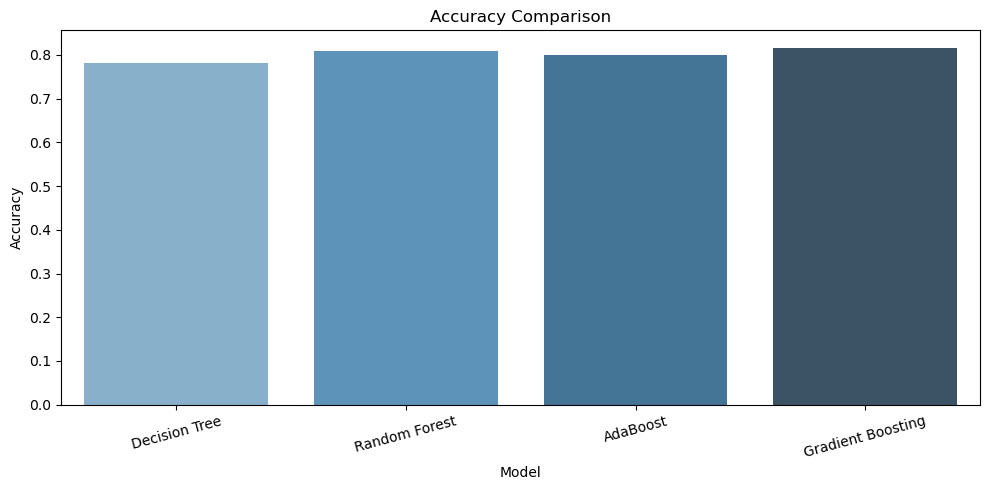

In [12]:
# Task 9: AdaBoost or Gradient Boosting 

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import time

# Load and preprocess Titanic dataset
titanic = sns.load_dataset('titanic')
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']].copy()
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])

X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model
results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    duration = end - start

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4),
        "Training Time (s)": round(duration, 4)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("Model Comparison on Titanic Dataset:")
print(results_df)

# Optional: Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Blues_d")
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
